# Project: No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset is on Medical appointments and its 14 associated variables (characteristics) as indicated below;

Column Dictionary as per the data sheet

    01 - PatientId        - Identification of a patient
    02 - AppointmentID    - Identification of each appointment
    03 - Gender           - Male or Female represented as M and F respectively.
    04 - AppointmentDay   - The day of the actuall appointment, when they have to visit the doctor.
    05 - ScheduledDay     - The day someone called or registered the appointment, this is before appointment of course.
    06 - Age              - How old is the patient.
    07 - Neighbourhood    - Where the appointment takes place.
    08 - Scholarship      - Whether the patient gets government medical assistance. it is represented by a numeric
                            categorical variable that covers the values of 1, 0 for True or False. 
    09 - Hipertension     - Disease condition represented with 1 and 0 for True or False respectively.
    10 - Diabetes         - Disease condition represented with 1 and 0 for True or False respectively.
    11 - Alcoholism       - Disease condition represented with 1 and 0 for True or False respectively.
    12 - Handcap          - Disease condition represented with 1 and 0 for True or False respectively.
    13 - SMS_received     - 1 or more messages sent to the patient.
    14 - No-show          - Whether the patient attended the appointment or not. Represented with No for attendance and Yes
                            for not attending.

 The objective of this investigation is to analyse the variables of importance so as to predict if a patient will show up for their scheduled appointment. My dependent variable is the No Show and i will investigate age, gender, communication, wait time period and severity of the medical condition in relation to appointment attendance.  

### Question(s) for Analysis

1. Does Age and Gender have an effect to appointment attendance?
2. Does Communication and Appointment waiting period contribute to appointment attendance?
3. Does the health condition severity ie Hypertension, Diabetes, Alcoholism affect attendance?  

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


Looking through the data before analysis;

    1. Gets me a feel of what the data is about
    2. What the schema looks like
    3. If its relevant to my objective
    4. Inspect it for cleanliness.


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('appointments_2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Checking the shape of the dataset
df.shape

(110527, 14)

In [5]:
# Checking null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#checking for null values to comfirm that there are no NULL values in it.
df.isna().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [7]:
# Cgecking for duplicated records in the dataset
df.duplicated().sum()

0

### Dataset Summary

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Insights:**

    1. In this dataset, there are 110,527 records representing the patients and 14 columns representing the variables or   
    attributes of the patients.
    2. In the 14 columns, 9 columns have Numerical datatype and 5 have Object datatype.
    3. There are no NULL values in the dataset.
    4. From the Analysis we can see that most patients are between age 

 

    


### Data Cleaning

At this stage we want to start cleaning our dataset in order to continue the analysis. Some of the questions we will ask ourselves are;

    1. Are the column names written well?
    2. Are there any duplicate records?
    3. What are the unique values of the variables and do they align with our objective?
    3. Do the data types match with what we need for our analysis?
    4. are there any useless or redundant variables?
    5. does the nomenclature make sense?
    6. are there any new variables we want to create?



In [9]:
# First change the column titles to more usable names
df.rename(columns={'PatientId': 'patient_id', 'ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day',
                   'Hipertension':'hypertension','No-show': 'no_show'}, inplace=True)

In [10]:
# Change the columns to lower case for cosistency and easy rememberance
df.columns= df.columns.str.lower()
df.head(1)

,patient_id,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
# Check Duplicated rows of the same patient with more than one attendance
df[['patient_id', 'no_show']].duplicated().sum()

38710

In [12]:
# Drop the duplicated rows and confirm
df.drop_duplicates(['patient_id', 'no_show'], inplace=True)
df[['patient_id', 'no_show']].duplicated().sum()

0

In [13]:
# Drop columns not needed in the analysis and confirm

df.drop(['patient_id','appointmentid', 'neighbourhood', 'handcap', 'scholarship'], axis=1, inplace=True)
df.head(1)

,gender,scheduled_day,appointment_day,age,hypertension,diabetes,alcoholism,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,1,0,0,0,No


In [14]:
# Check uniques values of the variables

print('Age:',sorted(df.age.unique()))
print('Gender:',df.gender.unique())
print('Diabetes:',df.diabetes.unique())
print('Alcoholism:',df.alcoholism.unique())
print('Hipertension:',df.hypertension.unique())
print('SMS received:',df.sms_received.unique())
print('No Show:',df.no_show.unique())


Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alcoholism: [0 1]
Hipertension: [1 0]
SMS received: [0 1]
No Show: ['No' 'Yes']


**Insight:**

    1. Age column has patient with -1 which we need to remove
    2. Gender, Diabetes, Alcoholism, Hypertension, SMS received and No Show columns have appropiriate values
           

In [15]:
# Confirm the -1 value of Age exists in the dataframe

df.loc[df['age']<0]

,gender,scheduled_day,appointment_day,age,hypertension,diabetes,alcoholism,sms_received,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,0,0,0,0,No


In [16]:
# Drop the row and confirm 

df.drop(index=99832, inplace=True)
df.loc[df['age']<0]

,gender,scheduled_day,appointment_day,age,hypertension,diabetes,alcoholism,sms_received,no_show


In [17]:
# Checking the data types 

df.dtypes

gender             object
scheduled_day      object
appointment_day    object
age                 int64
hypertension        int64
diabetes            int64
alcoholism          int64
sms_received        int64
no_show            object
dtype: object

**Insight:**

We can see the Scheduled day and Appointment day are of object data type. We want them to be in datetime data type for easier working


In [18]:
# Change the data types to datetime and to both be timezone-aware

df['appointment_day'] = pd.to_datetime(df['appointment_day']).astype('datetime64[ns, UTC]')
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).astype('datetime64[ns, UTC]')

In [19]:
# Confirmaing the data types changes
df.dtypes

gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
sms_received                     int64
no_show                         object
dtype: object

In [20]:
# Add wait days column which will be needed for analysis and Confirm integer data types

df["wait_days"] = (df["appointment_day"] - df["scheduled_day"] ).dt.days.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   gender           71816 non-null  object             
 1   scheduled_day    71816 non-null  datetime64[ns, UTC]
 2   appointment_day  71816 non-null  datetime64[ns, UTC]
 3   age              71816 non-null  int64              
 4   hypertension     71816 non-null  int64              
 5   diabetes         71816 non-null  int64              
 6   alcoholism       71816 non-null  int64              
 7   sms_received     71816 non-null  int64              
 8   no_show          71816 non-null  object             
 9   wait_days        71816 non-null  int32              
dtypes: datetime64[ns, UTC](2), int32(1), int64(5), object(2)
memory usage: 5.8+ MB


In [21]:
# Checking the values of the new column and its redundancy

df['wait_days'].unique()

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        48,  72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  61, 175,  53,  76,
        54,  68,  82,  75,  88,  80, 102,  78,  67, 111,  -2,  79,  85,
        97,  93,  84, 141, 154, 161, 168, 103, 132, 124,  95,  87, 150,
       125, 126, 110,  74,  73, 107, 101, 121, 100,  89, 118,  70,  96,
        92, 106,  94, 104,  91, 138, 109, 131, 178, 145])

In [22]:
# Confirming the values of -1 wait times exist

df.loc[df['wait_days']<0]

,gender,scheduled_day,appointment_day,age,hypertension,diabetes,alcoholism,sms_received,no_show,wait_days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,1,0,0,0,No,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,No,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,No,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,No,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,1,1,0,0,No,-1
...,...,...,...,...,...,...,...,...,...,...
110495,M,2016-06-01 13:49:47+00:00,2016-06-01 00:00:00+00:00,40,0,0,0,0,No,-1
110501,M,2016-06-01 10:19:12+00:00,2016-06-01 00:00:00+00:00,44,0,0,0,0,No,-1
110511,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,0,0,0,0,No,-1
110512,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,0,0,0,0,No,-1


In [23]:
# Drop the redundant wait times and reset the index

wd = df.loc[df['wait_days']<0].index
df.drop(wd,axis=0,inplace=True)
df = df.reset_index(drop=True)


In [24]:
# Confirm no wait days less than zero

df['wait_days'].unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  48,
        72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  61, 175,  53,  76,  54,
        68,  82,  75,  88,  80, 102,  78,  67, 111,  79,  85,  97,  93,
        84, 141, 154, 161, 168, 103, 132, 124,  95,  87, 150, 125, 126,
       110,  74,  73, 107, 101, 121, 100,  89, 118,  70,  96,  92, 106,
        94, 104,  91, 138, 109, 131, 178, 145])

In [25]:
df["wait_days_group"] = pd.cut(
    x=df["wait_days"],
    bins=[-1, 25, 50, 75, 100, 125],
    labels=["0 - 25", "26 - 50", "51 - 75", "76 - 100", "101 - 125"])
df.head(5)

,gender,scheduled_day,appointment_day,age,hypertension,diabetes,alcoholism,sms_received,no_show,wait_days,wait_days_group
0,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,1,0,0,0,No,1,0 - 25
1,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,Yes,1,0 - 25
2,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,Yes,1,0 - 25
3,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,No,1,0 - 25
4,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,0,0,0,0,No,1,0 - 25


In [26]:
# Create an Age group Column and confirm

df["age_group"] = pd.cut(
    x=df["age"],
    bins=[-1, 5, 18, 40, 60, np.inf],
    labels=["Infant", "Teenager", "Adult", "Middle_Aged", "Elderly"],)
df.head(5)

,gender,scheduled_day,appointment_day,age,hypertension,diabetes,alcoholism,sms_received,no_show,wait_days,wait_days_group,age_group
0,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,1,0,0,0,No,1,0 - 25,Elderly
1,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,Yes,1,0 - 25,Adult
2,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,Yes,1,0 - 25,Adult
3,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,No,1,0 - 25,Adult
4,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,0,0,0,0,No,1,0 - 25,Adult


In [27]:
# Confirm Age Group categories

df.age_group.unique()

['Elderly', 'Adult', 'Middle_Aged', 'Teenager', 'Infant']
Categories (5, object): ['Infant' < 'Teenager' < 'Adult' < 'Middle_Aged' < 'Elderly']

In [28]:
# Checking the dataset to see if their are other changes needed
df.head(5)

,gender,scheduled_day,appointment_day,age,hypertension,diabetes,alcoholism,sms_received,no_show,wait_days,wait_days_group,age_group
0,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,1,0,0,0,No,1,0 - 25,Elderly
1,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,0,0,0,0,Yes,1,0 - 25,Adult
2,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,0,0,0,0,Yes,1,0 - 25,Adult
3,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,0,0,0,0,No,1,0 - 25,Adult
4,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,0,0,0,0,No,1,0 - 25,Adult


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48156 entries, 0 to 48155
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   gender           48156 non-null  object             
 1   scheduled_day    48156 non-null  datetime64[ns, UTC]
 2   appointment_day  48156 non-null  datetime64[ns, UTC]
 3   age              48156 non-null  int64              
 4   hypertension     48156 non-null  int64              
 5   diabetes         48156 non-null  int64              
 6   alcoholism       48156 non-null  int64              
 7   sms_received     48156 non-null  int64              
 8   no_show          48156 non-null  object             
 9   wait_days        48156 non-null  int32              
 10  wait_days_group  48087 non-null  category           
 11  age_group        48156 non-null  category           
dtypes: category(2), datetime64[ns, UTC](2), int32(1), int64(5), object(2)
memo

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does Age and Gender have an effect to appointment attendance?)



### KEY
            *Infant 0 - 5 Years
            *Teenager 6 - 18 Years
            *Adult 19 - 40 Years
            *Middle Aged 41 - 60 Years
            *Elderly 61 and above
            
            

We'll create a function to plot the value counts of the Age, Gender and No Show columns to get a visual of their distribution.

In [30]:
# Function to plot value counts of columns

def plot_counts(df,column,title,xlabel,ylabel):
  # Print the value counts
  print(df[column].value_counts())

  # Plot the value counts
  df[column].value_counts().plot(kind='bar', figsize=(6,4),
                                 title=title,xlabel=xlabel,ylabel=ylabel)
  plt.xticks(rotation=0, horizontalalignment="center")

Adult          13528
Middle_Aged    13459
Elderly         9167
Teenager        7304
Infant          4698
Name: age_group, dtype: int64


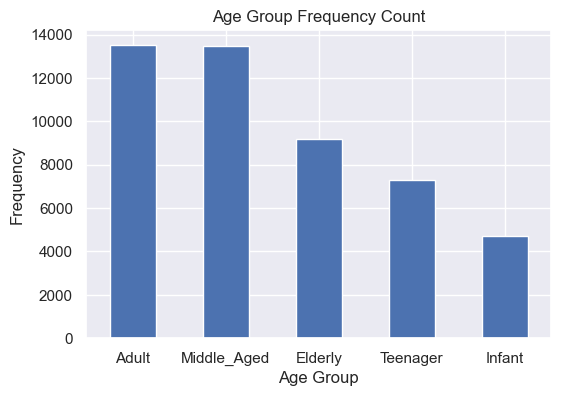

In [53]:
# Visual count of age group distribution

plot_counts(df,'age_group',title='Age Group Frequency Count',xlabel='Age Group',ylabel='Frequency')

F    31665
M    16491
Name: gender, dtype: int64


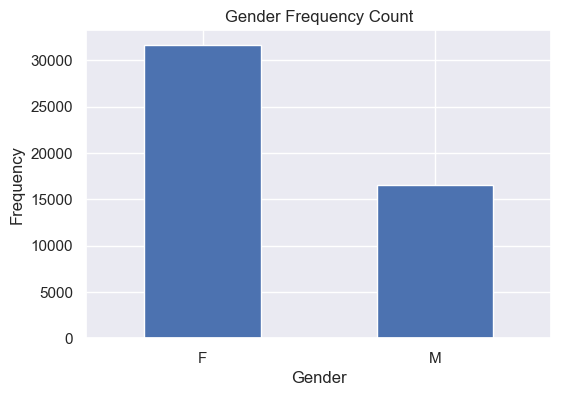

In [54]:
# Visual Count of Gender distribution using a function

plot_counts(df,'gender',title='Gender Frequency Count',xlabel='Gender',ylabel='Frequency')

No     31665
Yes    16491
Name: no_show, dtype: int64


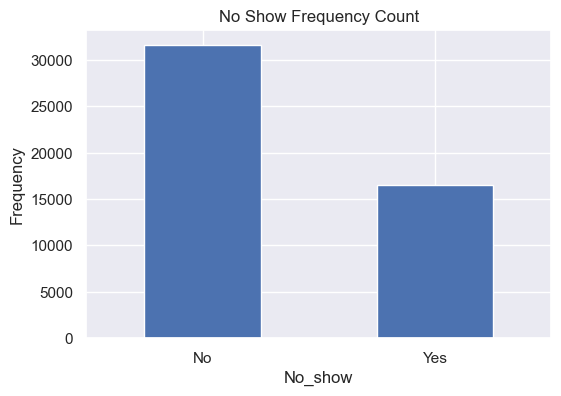

In [55]:
# Visual count of No Show distribution using a function

plot_counts(df,'no_show',title='No Show Frequency Count',xlabel='No_show',ylabel='Frequency') 

We'll then look at no- show and appointment attendance in relation to;
   
         1. Age
         2. Gender
         3. Age and gender
We'll test the hypothesis that;
            
         1. The different types of age group a patient belongs to can affect their attendance to the appointment
         2. Gender plays a role in appointment attendance 
         3. A combination of age and gender variable can affect attendance depending on the group the patient belongs to
         
We'll create two functions; 
            
          1. to plot a bar chart using pandas crosstab 
          2. that creates a faceted histogram using seaborn 
          
Both functions will be frequently used to test our hypothesis


In [34]:
# Create a function to plot bar chart using pandas crosstab which will be frequently used

def generate_plot(df, x_column, y_column, figsize=(6,4)):
    diagram = pd.crosstab(index=df[x_column], columns=df[y_column])
    print(diagram)
    diagram.plot.bar(figsize=figsize)
    plt.xticks(rotation=0, horizontalalignment="center")
    

no_show        No   Yes
age_group              
Infant       2942  1756
Teenager     4463  2841
Adult        8115  5413
Middle_Aged  9291  4168
Elderly      6854  2313


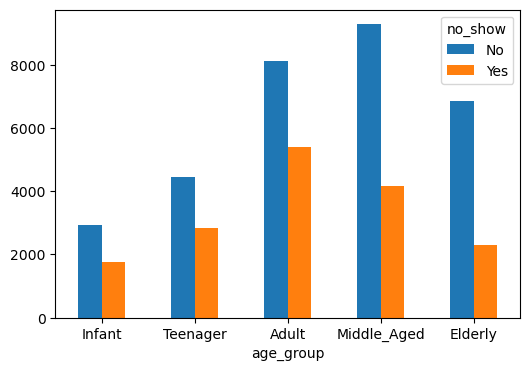

In [35]:
# No Show and attendance depending on Age using a function

generate_plot(df, 'age_group', 'no_show')

**Insights:**

    Middle-aged(41 - 60 years) and adults(19 - 40 years) are highest attendees followed by the elderly and the infants 
    ranked lowest.
    
    We can see adults(19 - 40 years) rank highest when in comes to not showing up for appointments and infants raking 
    lowest.

no_show     No    Yes
gender               
F        20838  10827
M        10827   5664


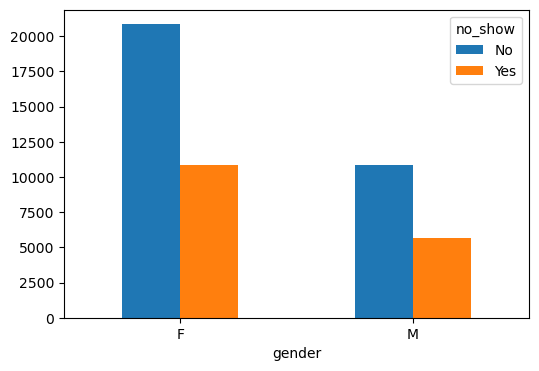

In [36]:
# No Show and attendance depending on the gender using a function...normalize =True

generate_plot(df, 'gender', 'no_show')

**Insights:**

    We can see Females have a higher appointment attendance percentage of 43% compaired to Males of 22%. 
    
    The difference in attendees to no show between males and females shows that alot of female patients attend appointments being that the difference is significant for females than it is for men. For the males, the difference in attendees and no - show, is small indicating not a very significant difference. 

In [37]:
# a function that creates a faceted histogram plot using seaborn, 
# with 'x_column' on the x-axis and 'hue_column' and 'row_column' used to split the data into separate facets.

def generate_fgrid(df, x_column, hue_column, row_column=None, sharex=False):
    g = sns.FacetGrid(df, col=hue_column, row=row_column, sharex=sharex)
    g = g.map(plt.hist, x_column)
    g.add_legend()
    plt.show()
    

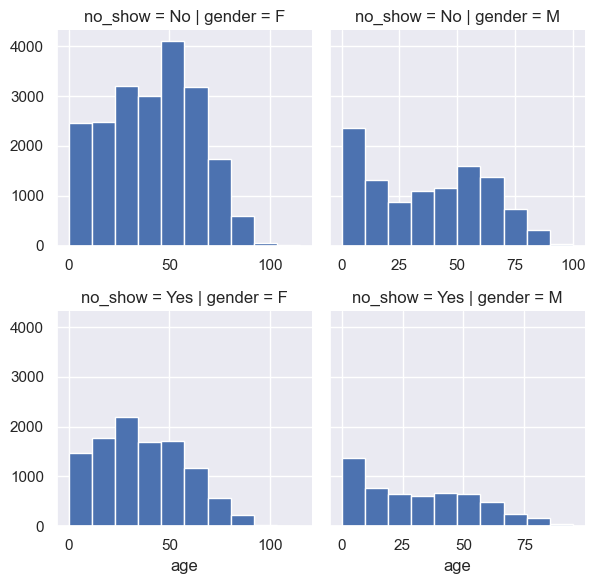

In [52]:
# No show and attendance depending on gender and age using a function
generate_fgrid(df, 'age', 'gender', row_column='no_show', sharex=False)

**Insights:**

        Attended and Female - most are adults and middle aged ranging from 19 to 60 years
        Attended and Male   - the highest are infants and teenagers but attendance is fair among all age groups
        No Show and Female  - most are infants and young aged 
        No Show and Male    - highest are infants and it is fairly even among the other age groups
        


**Take aways:**

        Being that females are double the number of males, their higher percentage attendance compaired to that of males is             also double, indicating overall they are slightly equal in attendance. The difference comes about in the age group 
        distribution.  
        
        The highest number of attendees fall in the adult and middle aged bracket for females compaired to the male whose
        highest attendees fall in the younger and elderly bracket. 
        
        From this we can tell for women, the adult and middle aged do follow - up with their appointments and for males, the
        elderly are consistent with showing-up for their appointments. 
        
        

### Research Question 2  (Does Communication and Appointment waiting period contribute to appointment attendance?)

We'll investigate the following to elaborate the relationship;

        A.Wait time period
             1. Wait time period and No show for appointments
             2. Wait time period, No show for appointments and Gender
             3. Wait time period, No show for appointments and Age.
       B.Communication
             1. SMS received and No Show
             2. SMS received, No show and Age
             3. SMS received, No show and waiting period.

We'll test the hypothesis that wait time period between scheduled day and the actual appointment day can affect the outcome of whether a patient shows up for the appointment or not. We'll also look into how SMS communication is perceived between the different age group in relation to appointment attendance. Is it important? If so, which age group take it more seriously compaired to the other. We'll use functions created to generate our plots.
  

no_show             No    Yes
wait_days_group              
0 - 25           24611  12529
26 - 50           5517   3191
51 - 75           1232    630
76 - 100           228    104
101 - 125           33     12


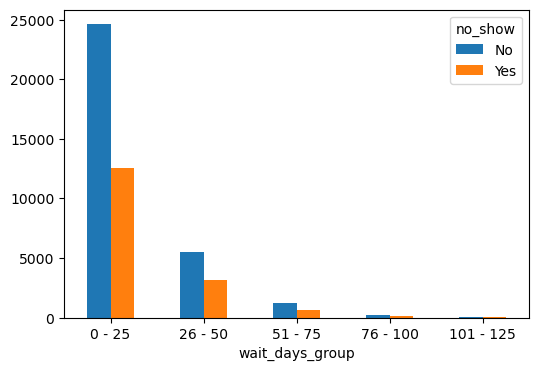

In [39]:
# Wait Days and No Show using a function

generate_plot(df, 'wait_days_group', 'no_show')

**Insight:**

        Patients who had a shorter wait period have a high attendance rate compaired to patients who has longer wait period.
        
        Surprisingly, patients with short wait period also recorded the highest number of no show to their appointments.
        For longer wait period, patients who attended their appointments are more compaired to those who did not. 

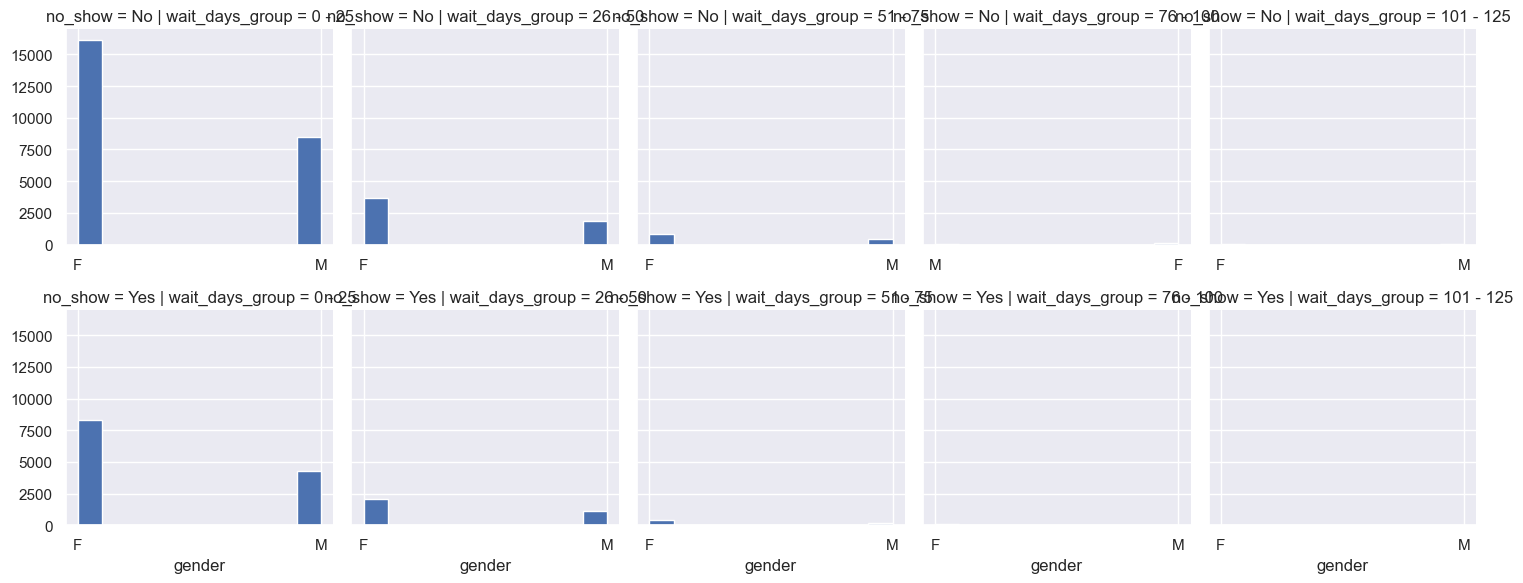

In [51]:
# Wait days, No show and gender using a function
generate_fgrid(df, 'gender', 'wait_days_group', row_column='no_show', sharex=False)

**Insights:**
    
        Both genders have a higher percentage of attendance when the wait times is shorter. 
        
        Compairing the ratio of short wait period to long wait period for both female and males, females have a high 
        percentage of attendance compaired to the males. 
        
        When the wait time period is long(51 - 70) the percentage of females not showing up is higher compaired to men.
        Therefore the longer the wait times the more the chance of females not showing up.
        
        

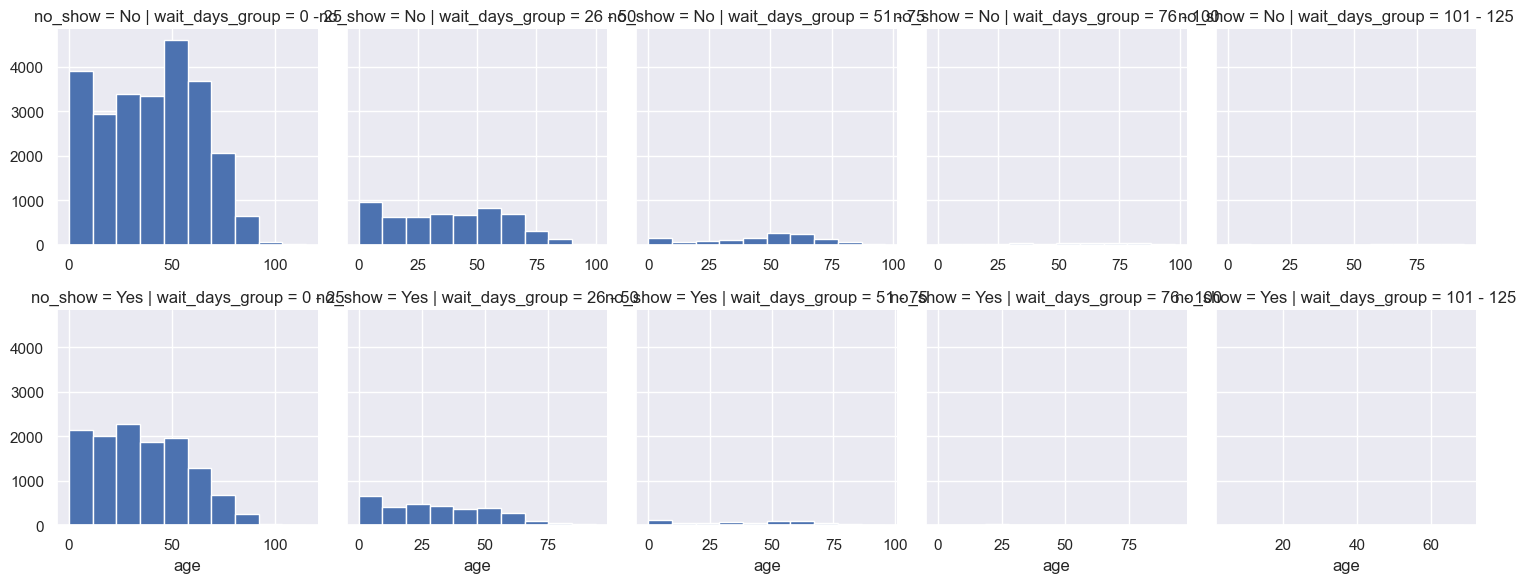

In [50]:
# Wait Days, No Show and Age using a function

generate_fgrid(df, 'age', 'wait_days_group', row_column='no_show', sharex=False)

**Insights:**
        
        The infant, teenagers and adult age groups have a higher percentage of appointment attendance when they have a 
        shorter wait time compaired to when they have a longer wait period. 
        
        The middle aged and elderly age group still show up whether their wait times is shorter or longer. 
        
        

**Take Aways:**
        
        Their is a correlation between gender, wait time period and no show/attending appointments. The more wait times 
        for females the high chances of them not showing up for the appointments compaired to men.
        
        From the findings, the age group and the wait time period they have has a significance in attendance or no show 
        of appointments.

no_show          No   Yes
sms_received             
0             15569  8488
1             16096  8003


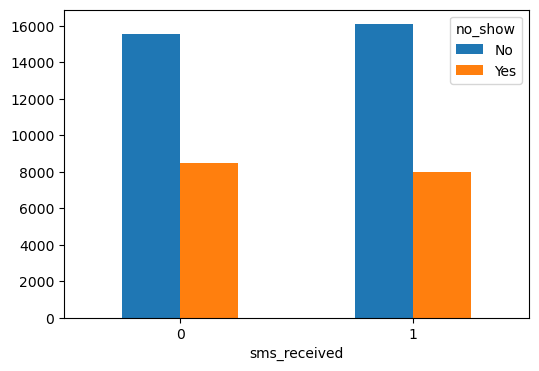

In [42]:
# SMS received and No show using a function....normalize =True

generate_plot(df, 'sms_received', 'no_show')

**Insights:**
 
    KEY 
        0 - No SMS Received 
        1 - SMS received
        No-show No - Attended
        No-show Yes - No attendance
    
    Those who received SMS and showed up is at 34% which is slightly more than the patients who didnt receive SMS but 
    still showed up which is at 32%
    The patients who received SMS and didn't show up is 16% which is slightly less than those who didn't received SMS 
    and didn't show up at 17%
    

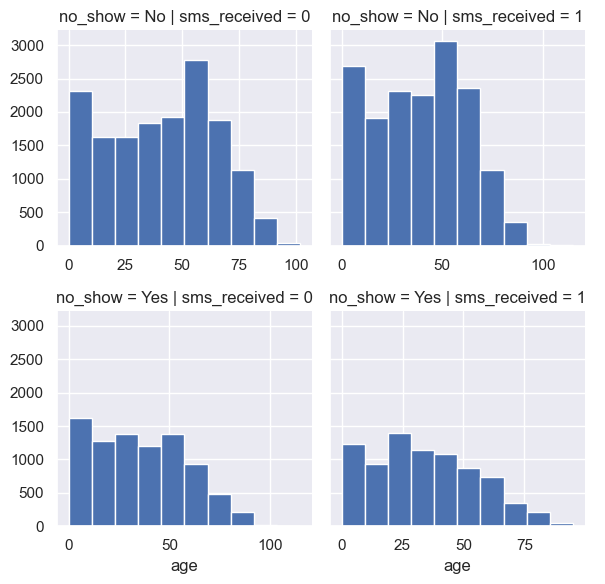

In [49]:
# SMS received, No Show and Age using a function

generate_fgrid(df, 'age', 'sms_received', row_column='no_show', sharex=False)

**Insights:**
    
        The age group of 0 to 60 years recorded a higher percentage of attendance for those who received SMS compaired to 
        the same age group of those who did not receive SMS. The opposite is true for the elderly(61 and above years). 
        The percentage of attendance is higher for those who did not receive SMS but still showed up compaired to those 
        who received SMS. This shows a significance in SMS for 0 - 60 years old compaired to 61 years and above. 
        
        The age group of 0 to 60 years recored a higher percentage of no show for those who did not receive SMS compaired 
        to those who did. The signifance of SMS is small in this age group in relation to the difference in ratio of 
        no attendance. The elderly, no significance of SMS to no show of appointments as their is no difference in 
        the numbers.

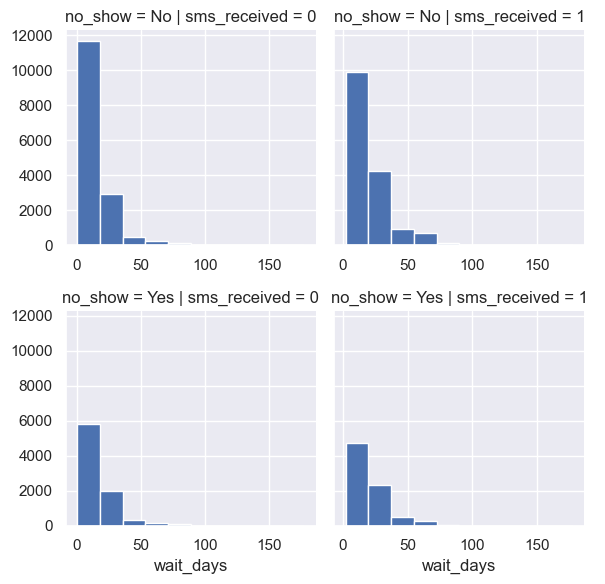

In [48]:
# SMS, Wait days and No show using a function

generate_fgrid(df, 'wait_days', 'sms_received', row_column='no_show', sharex=False)

**Insights:**
    
        
        Short wait time period recored a high percentage of attendance for both those who received SMS and those who 
        did not.
        
        Long wait time period recored a higher percentage of attendance for those who received SMS compaired to those 
        who did not receive SMS.
        
        

**Take Away:**
        
        The infants(0 - 5 years), teenagers(6 - 18 years), adults(19 - 40 years), and middle aged(41 - 60 years) have a
        correlation of attendance to receiving SMS. The elderly(61 and above years) do not necessarily need SMS reminders
        as their attendance numbers are high in both occassions of SMS communication and of not.
        
        Short wait time period for those who attended and did not receive SMS, the attendance is slightly higher compaired 
        to the patients who did receive SMS. The significance difference is quite small. This shows SMS received or not 
        received has a small significance for short wait time period. The same is seen for those who did not attend their
        appointments as the difference to those who received SMS and to those who did not is small.  
        
        Long wait time period of 50 days and above show, those who received SMS and attended their appointments recored 
        a higher number compaired to those who did not receive SMS but still attended. This signifies the importance of 
        SMS for longer wait time period patients to attending their appointments. 


<b>Research Question 3 (Does the health condition severity ie Hypertension, Diabetes, Alcoholism make a patient attend his appointment?)<b\>

In [45]:
# Condition count for full picture

df.groupby(['no_show','hypertension'])['hypertension'].count()\
,df.groupby(['no_show','diabetes'])['diabetes'].count()\
,df.groupby(['no_show','alcoholism'])['alcoholism'].count() 


(no_show  hypertension
 No       0               24595
          1                7070
 Yes      0               13654
          1                2837
 Name: hypertension, dtype: int64,
 no_show  diabetes
 No       0           29235
          1            2430
 Yes      0           15409
          1            1082
 Name: diabetes, dtype: int64,
 no_show  alcoholism
 No       0             30979
          1               686
 Yes      0             16011
          1               480
 Name: alcoholism, dtype: int64)

**We'll focus on patients with the said conditions represented with 1 for this analysis**. The hypothesis in mind is that the more severe a condition is depicted to be the more the number of appointment attendance as the patients will take it more seriously

<AxesSubplot:xlabel='alcoholism', ylabel='count'>

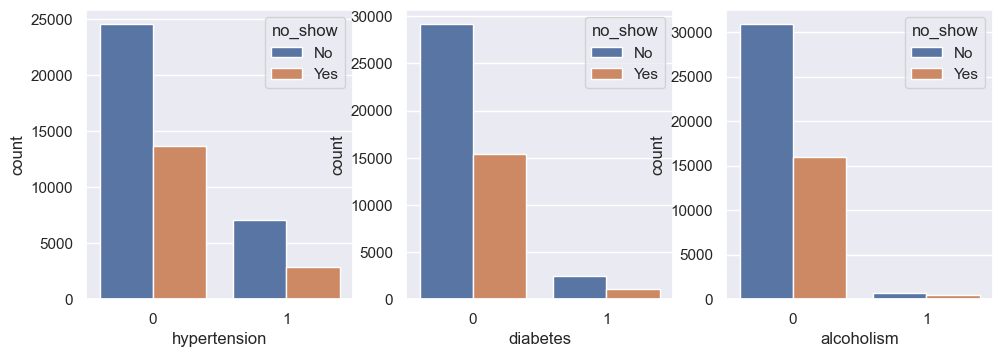

In [46]:
# Bivariate analysis is finding some kind of empirical relationship between two variables.

sns.set(rc={'figure.figsize':(11.7,8.27)}) # sns.set() is used for setting the size of output figure.
plt.subplot(231)
sns.countplot(x="hypertension",hue=df.no_show, data=df)
plt.subplot(232)
sns.countplot(x="diabetes",hue=df.no_show, data=df)
plt.subplot(233)
sns.countplot(x="alcoholism", hue=df.no_show, data=df)

**Insights:**
    
      Focusing on the patients with the condition which is represented with 1, a higher percentage of patients attended 
      their appointments compaired to the patients with diabetes and alcoholism. Patients with alcoholism have the same 
      numbers in attendance and no show. This shows patients with diabetes take appointments more seriously compaired 
      to the other two. 
      

**Take Away:**
    
        Being that hypertension is a more severe condition, the findings depict the hypothesis of the more severe a 
        condition the more appointment attendance.

<a id='conclusions'></a>
## Conclusions



     1. More focus on pregnant women, young mothers and the elderly females need to be put to entice them to attent to their
     appointments. For the males, more focus on young fathers, teenagers and adults need to be put.
     2. From the findings, the age group and the wait time period they have has a significance in attendance or no show of
     appointments. Female patients tend to not attent appointments when the wait time period is longer compaired to the
     males.The younger patients of age group 0 to 40 years need to be sensitized on importance of taking their health
     conditions seriously. 
     3. SMS communication is more significant for patients with a longer wait time period compaired to a short wait time
     period.
     4. Sensitization of attendance to appointments should be made to patients who have the conditions not depicted as 
     severe as they tend to not take the appointmnets seriously. 
     
 More research need to be done on the stigmatization of the disease severiety in relation to appointment attendance. 
 The limitation this investigation faced is the sample bias in terms of gender as the female were double the number of male patients.

**Reference**

    1. Learned more about bar charts in python using, https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
    2. Read alot of medium articles ie; "https://towardsdatascience.com/an-introduction-to-exploratory-data-analysis-in-python-9a76f04628b8" , https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee" , 
    3. Used Data to fish website "https://datatofish.com/python-tutorials/"
    4. Learnt to visialize relationship through categorical variables here, https://thinkingneuron.com/how-to-visualize-the-relationship-between-two-categorical-variables-in-python/
    5. Learned a few things from Kaggle here https://www.kaggle.com/code/kanncaa1/data-sciencetutorial-for-beginners
    6. My dataset link https://www.kaggle.com/datasets/joniarroba/noshowappointments



In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1